## Importing required libraries

In [24]:
import os
import json
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from pandas.io.json import json_normalize
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn import metrics

## Loading data which has json fields in multiple columns. 
### Used kernal by Julian Peller(https://www.kaggle.com/julian3833/1-quick-start-read-csv-and-flatten-json-fields)

In [25]:
def load_df(csv_path='../input/train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(csv_path, 
                     converters={column: json.loads for column in JSON_COLUMNS}, 
                     dtype={'fullVisitorId': 'str'}, # Important!!
                     nrows=nrows)
    
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
    print(f"Loaded {os.path.basename(csv_path)}. Shape: {df.shape}")
    return df

In [26]:
df1 = load_df("train.csv")

Loaded train.csv. Shape: (903653, 55)


In [27]:
##Exporting the flattened csv file for modelling 
df1.to_csv("train-new.csv", index=False)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 55 columns):
channelGrouping                                      903653 non-null object
date                                                 903653 non-null int64
fullVisitorId                                        903653 non-null object
sessionId                                            903653 non-null object
socialEngagementType                                 903653 non-null object
visitId                                              903653 non-null int64
visitNumber                                          903653 non-null int64
visitStartTime                                       903653 non-null int64
device.browser                                       903653 non-null object
device.browserSize                                   903653 non-null object
device.browserVersion                                903653 non-null object
device.deviceCategory                                9036

In [29]:
df1.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


In [30]:
df1.describe()

,date,visitId,visitNumber,visitStartTime
count,9.036530e+05,9.036530e+05,903653.000000,9.036530e+05
mean,2.016589e+07,1.485007e+09,2.264897,1.485007e+09
std,4.697698e+03,9.022124e+06,9.283735,9.022124e+06
min,2.016080e+07,1.470035e+09,1.000000,1.470035e+09
25%,2.016103e+07,1.477561e+09,1.000000,1.477561e+09
50%,2.017011e+07,1.483949e+09,1.000000,1.483949e+09
75%,2.017042e+07,1.492759e+09,1.000000,1.492759e+09
max,2.017080e+07,1.501657e+09,395.000000,1.501657e+09


In [31]:
## Converting date to a proper format
df1["date"] = pd.to_datetime(df1["date"], format="%Y%m%d")

In [32]:
df1.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


In [33]:
#converting numerical columns to float type
for col in ['visitNumber', 'totals.hits', 'totals.pageviews', 'totals.transactionRevenue']:
    df1[col] = df1[col].astype(float)

In [34]:
## caluculating total revenue per user
trpu = df1.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index() #trpu - total revenue per user

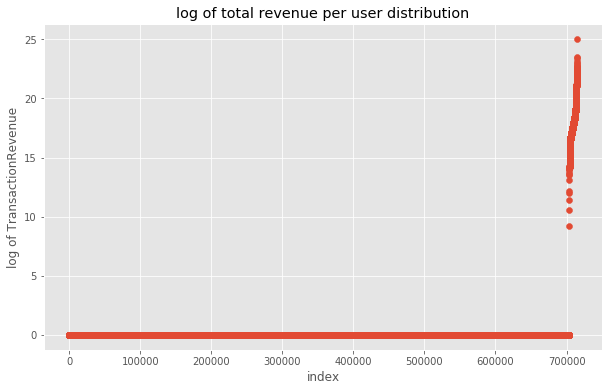

In [35]:
## Plot showing count of total revenue
plt.figure(figsize=(10,6))
plt.scatter(range(trpu.shape[0]), np.sort(np.log1p(trpu["totals.transactionRevenue"])))
plt.xlabel('index')
plt.ylabel('log of TransactionRevenue')
plt.title("log of total revenue per user distribution")
plt.show()

In [36]:
print("Number of instances with non-zero revenue in train set is ",(df1['totals.transactionRevenue']>0).sum() , " out of ",df1.shape[0], "instances and the ratio is ",(df1['totals.transactionRevenue']>0).sum()/df1.shape[0] )
print("Number of unique visitors in the dataset is ",df1.fullVisitorId.nunique(), " out of ",df1.shape[0], "and the ratio is ",df1.fullVisitorId.nunique()/df1.shape[0] )
nzr = (trpu["totals.transactionRevenue"]>0).sum() #nzr - non zero revenue
print("Number of unique customers with non-zero revenue ", nzr , "and the ratio is ", nzr / df1.fullVisitorId.nunique())

Number of instances with non-zero revenue in train set is  11515  out of  903653 instances and the ratio is  0.0127427231470487
Number of unique visitors in the dataset is  714167  out of  903653 and the ratio is  0.7903111039303804
Number of unique customers with non-zero revenue  9996 and the ratio is  0.013996726255903731


## Exploratory data visualizations 

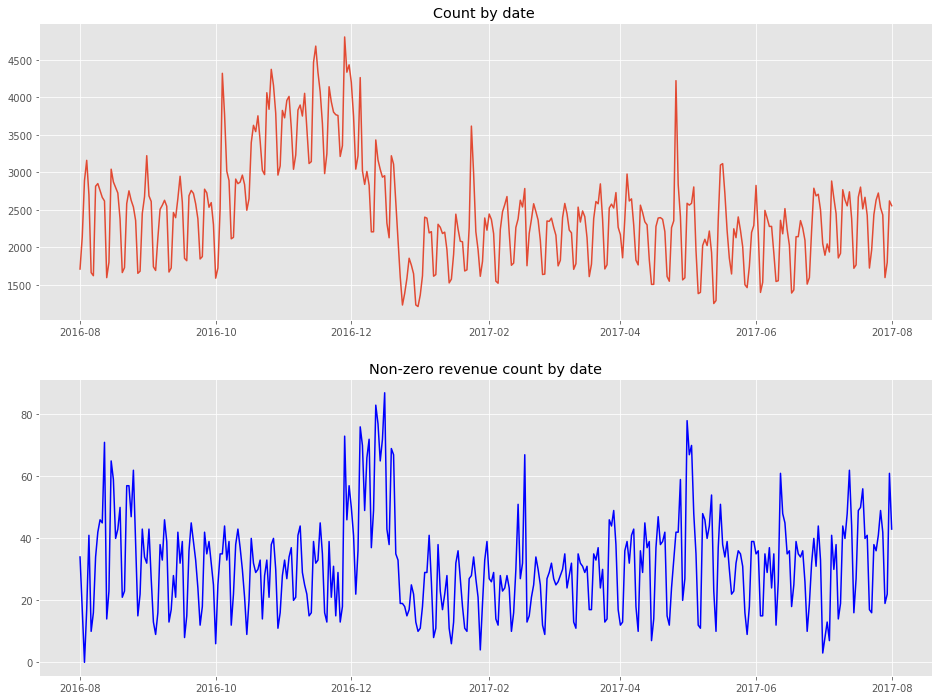

In [37]:
#Plot showing sample count and nonzero revenue count by date

plt.figure(figsize=(16,12))

plt.subplot(2,1,1)
plt.plot(df1.groupby('date')['totals.transactionRevenue'].agg('size'))
plt.title('Count by date ')
plt.subplot(2,1,2)
plt.plot(df1.groupby('date')['totals.transactionRevenue'].agg('count'),color='b')
plt.title('Non-zero revenue count by date');

1. The plots show that there is correlation between number of users and revenue for that day.
2. During october'16 , though there is an increase in number of users there is no increase in revenue.

In [38]:
## Dataframe which consists of non zero total revenue 
df_ = df1.loc[df1['totals.transactionRevenue'] > 0.0]

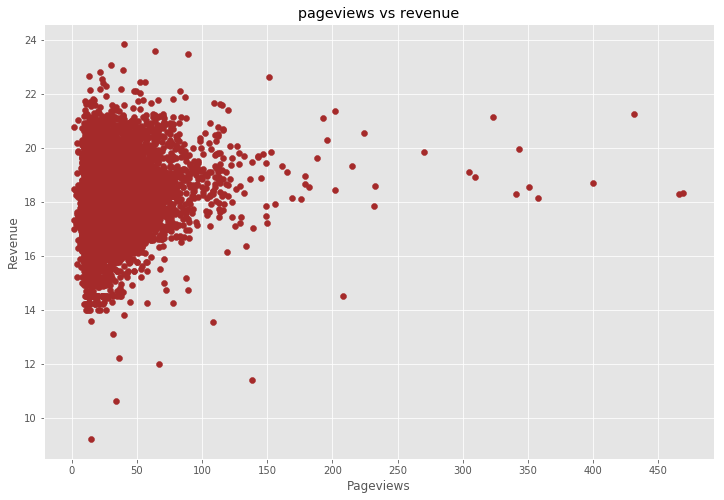

In [39]:
## Plot showing revenue per with increase in number of pageviews 
plt.figure(figsize=(12, 8))
plt.title('pageviews vs revenue')
plt.scatter(df_['totals.pageviews'], np.log1p(df_['totals.transactionRevenue']),color='brown')
plt.xticks(np.arange(0, max(df_['totals.pageviews'])+1, 50.0))
plt.xlabel('Pageviews')
plt.ylabel('Revenue');

1. Most of the revenue generating users has page views less than 100
2. This shows that increase in number of page views doesnt translate to increase in revenue.

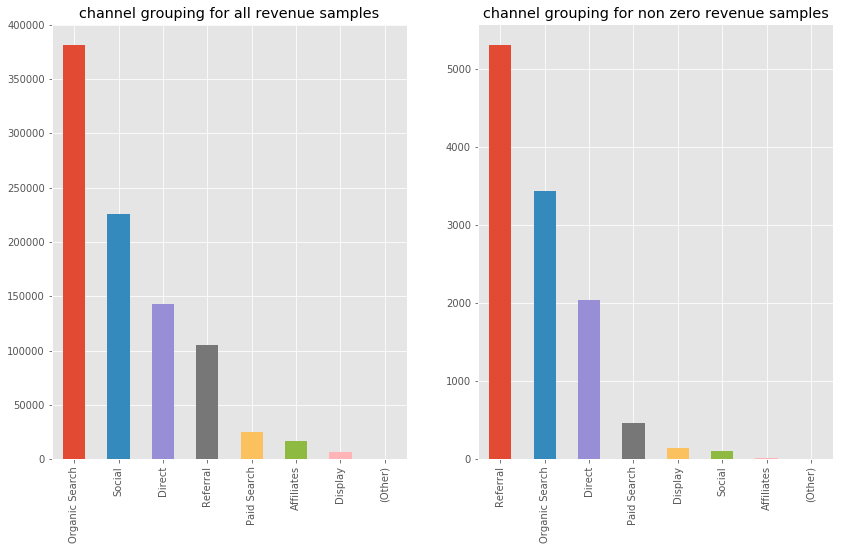

In [40]:
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
df1["channelGrouping"].value_counts().plot(kind="bar")
plt.title('channel grouping for all revenue samples')
plt.subplot(1,2,2)
df_["channelGrouping"].value_counts().plot(kind="bar")
plt.title('channel grouping for non zero revenue samples');

1. Organic search, social and Direct are the most common types of channels. 
2. Referral is the channel type through which most non zero transactions occur.

In [41]:
temp2 = pd.DataFrame(df_.groupby('geoNetwork.country', as_index=False)['totals.transactionRevenue'].agg('sum').sort_values('totals.transactionRevenue', ascending=False).head(5))

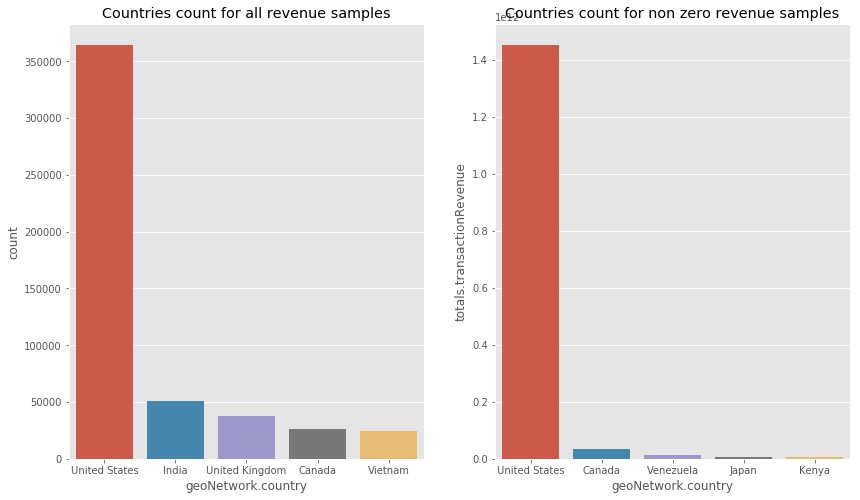

In [42]:
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
sns.countplot(x=df1['geoNetwork.country'],
              order=df1['geoNetwork.country'].value_counts().iloc[:5].index)
plt.title('Countries count for all revenue samples')
plt.subplot(1,2,2)
sns.barplot(temp2['geoNetwork.country'],temp2['totals.transactionRevenue'])
plt.title('Countries count for non zero revenue samples');

1. Most of the users are from USA, India and Uk.
2. Most of the revenue is generated from users in USA.

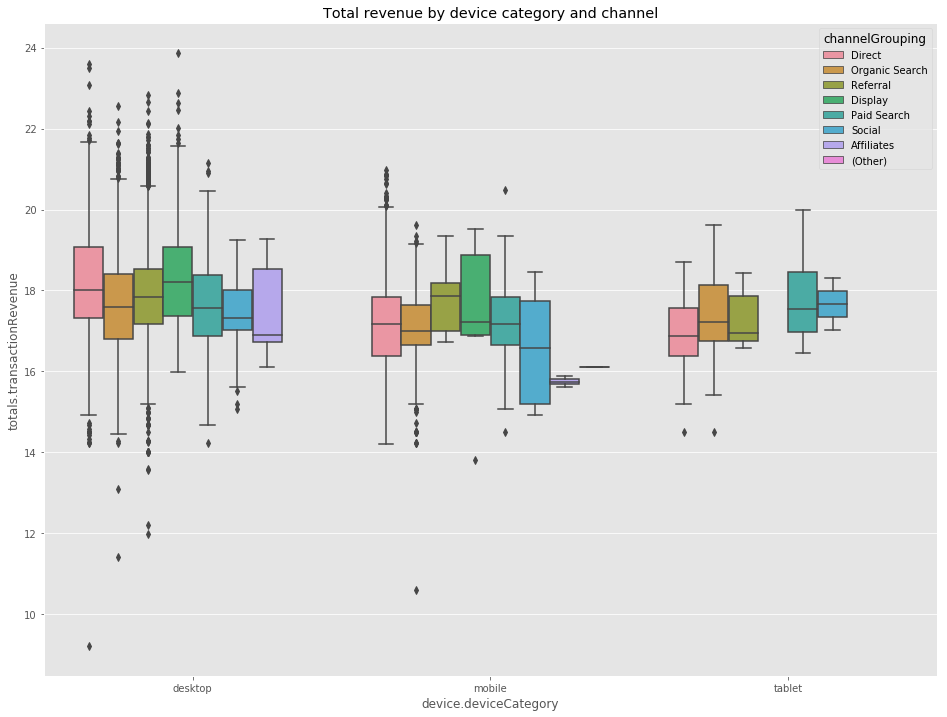

In [43]:
## Plot showing distribution of revenue by device category and channel.
plt.figure(figsize=(16, 12))
sns.boxplot(x=df_["device.deviceCategory"], y=np.log1p(df_['totals.transactionRevenue']), hue=df_["channelGrouping"])
plt.title("Total revenue by device category and channel");
plt.show()

1. Among desktop users, most revenue is generated by Direct, referral and display channels. 
2. Among mobile users, most revenue is generated by referral and display channels.
3. Among tablet users, most revenue is generated by paid search and referral channels.
4. Referral seems to be the most common channel for revenue generating users as corroborated by the above visualizations.  

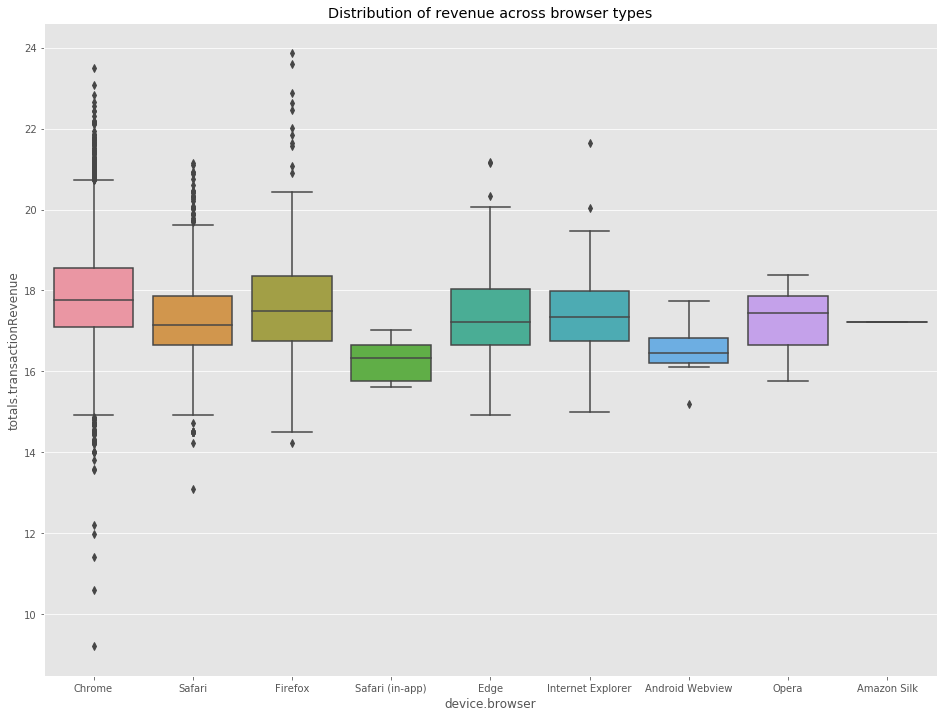

In [44]:
plt.figure(figsize=(16, 12))
sns.boxplot(x=df_["device.browser"], y= np.log1p(df_['totals.transactionRevenue']))
plt.title("Distribution of revenue across browser types");

1. Chrome, firefox and Edge browsers have the highest mean revenue. 

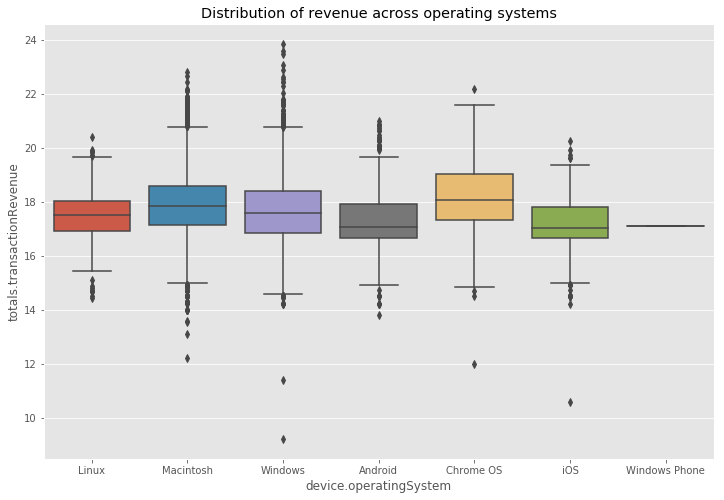

In [45]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df_["device.operatingSystem"], y= np.log1p(df_['totals.transactionRevenue']))
plt.title("Distribution of revenue across operating systems");

1. Highest meaen revenue is generated by Chrome OS and Mac users. Windows users have the highest revenues.

## Baseline model

In [46]:
df3 = pd.read_csv("train-new.csv")

C:\Users\pvloh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
##Dropping constant value columns 
const_cols = [c for c in df3.columns if df3[c].nunique(dropna=False)==1 ]
cols_to_drop = const_cols + ['sessionId']

df3 = df3.drop(cols_to_drop, axis=1)

['socialEngagementType',
 'device.browserSize',
 'device.browserVersion',
 'device.flashVersion',
 'device.language',
 'device.mobileDeviceBranding',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.operatingSystemVersion',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'trafficSource.adwordsClickInfo.criteriaParameters']

In [7]:
df3["totals.transactionRevenue"] = df3["totals.transactionRevenue"].astype('float')
df3["totals.transactionRevenue"].fillna(0, inplace=True)

In [8]:
#converting numerical columns to float
num_cols = ["totals.hits", "totals.pageviews", "visitNumber", "visitStartTime", 'totals.bounces',  'totals.newVisits']    
for col in num_cols:
    df3[col] = df3[col].astype(float)

In [11]:
# label encode the categorical variables and convert the numerical variables to float
cat_cols = ["channelGrouping", "device.browser", 
            "device.deviceCategory", "device.operatingSystem", 
            "geoNetwork.city", "geoNetwork.continent", 
            "geoNetwork.country", "geoNetwork.metro",
            "geoNetwork.networkDomain", "geoNetwork.region", 
            "geoNetwork.subContinent", "trafficSource.adContent", 
            "trafficSource.adwordsClickInfo.adNetworkType", 
            "trafficSource.adwordsClickInfo.gclId", 
            "trafficSource.adwordsClickInfo.page", 
            "trafficSource.adwordsClickInfo.slot", "trafficSource.campaign",
            "trafficSource.keyword", "trafficSource.medium", 
            "trafficSource.referralPath", "trafficSource.source",
            'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.isTrueDirect']
for col in cat_cols:
    print(col)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(df3[col].values.astype('str')) )
    df3[col] = lbl.transform(list(df3[col].values.astype('str')))

channelGrouping
device.browser
device.deviceCategory
device.operatingSystem
geoNetwork.city
geoNetwork.continent
geoNetwork.country
geoNetwork.metro
geoNetwork.networkDomain
geoNetwork.region
geoNetwork.subContinent
trafficSource.adContent
trafficSource.adwordsClickInfo.adNetworkType
trafficSource.adwordsClickInfo.gclId
trafficSource.adwordsClickInfo.page
trafficSource.adwordsClickInfo.slot
trafficSource.campaign
trafficSource.keyword
trafficSource.medium
trafficSource.referralPath
trafficSource.source
trafficSource.adwordsClickInfo.isVideoAd
trafficSource.isTrueDirect


In [16]:
#split into train and test based on date
df3_dev = df3[df3['date']<=20170430]
df3_val = df3[df3['date']>20170430]
df3_dev_y = np.log1p(df3_dev["totals.transactionRevenue"].values)
df3_val_y = np.log1p(df3_val["totals.transactionRevenue"].values)

df3_dev_X = df3_dev[cat_cols + num_cols] 
df3_val_X = df3_val[cat_cols + num_cols]

In [17]:
df3_dev_X.fillna(1, inplace=True)
df3_val_X.fillna(1, inplace=True)

C:\Users\pvloh\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [22]:
%%time
from sklearn.linear_model import LinearRegression
reg = LinearRegression(normalize=False)
reg.fit(df3_dev_X, df3_dev_y)
pred_val = reg.predict(df3_val_X)
pred_val[pred_val<0] = 0
val_pred_df = pd.DataFrame({"fullVisitorId":df3_val["fullVisitorId"].values})
val_pred_df["transactionRevenue"] = df3_val["totals.transactionRevenue"].values
val_pred_df["PredictedRevenue"] = np.expm1(pred_val)
val_pred_df = val_pred_df.groupby("fullVisitorId")["transactionRevenue", "PredictedRevenue"].sum().reset_index()
test_RMSE = np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values)))
score= r2_score(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))
print('RMSE',test_RMSE)
print('r2_score',score)

RMSE 2.079381636992978
r2_score 0.21093525674316582
Wall time: 1.29 s
